# Dataset Description

# Course Datasets 

In this course, you will work with **two real-world datasets**.  
Each dataset represents a different type of machine learning problem.  
Because the data are different, we will use **different models** for each one.

---

## Raw Eye-Tracking Data
The eye-tracking data collected from multiple users for the task of **user identification**.  
The goal is to predict the **User ID** based solely on eye movement behavior.

Each user in the dataset has **two separate eye-tracking recordings**, corresponding to two different recording sessions. This design allows the model to learn user-specific eye movement patterns that generalize across sessions rather than memorizing a single recording.

---




### How is the eye tracking Data Represented?

- `UserID` uniquely identifies a participant  
- `SessionID` indicates the recording session (1 or 2)

**Example:**
- `ID_240_1.txt` → User 240, session 1  
- `ID_240_2.txt` → User 240, session 2  

---


Each file contains **time-ordered eye-tracking samples**, where each row represents a single time step recorded by the eye tracker.

The raw measurements include gaze-related values such as:
- Horizontal and vertical gaze coordinates
- Eye movement dynamics
- Other low-level eye-tracking signals

These measurements capture the **temporal dynamics of visual behavior**.

---

## Dataset B: Material Science Dataset

### How is the Material Science Data Represented?

Each material sample is stored as a **2D grid**, similar to an image.

- Each cell in the grid contains a numerical value  
- The value represents a physical or chemical property  
- Together, the grid shows a **pattern across the material**  

You can think of each sample as a **map of material properties**.

---

### Why Does Spatial Structure Matter?

In material science:
- Nearby regions affect each other  
- Local patterns influence overall material behavior  
- The **position** of each value is important  

If the values in the grid are shuffled, the meaning of the data is lost.

> Where a value is located matters just as much as the value itself.

---

## Data Exploration

Data exploration is the process of examining a dataset to understand its structure, identify patterns, detect outliers, test assumptions, and generate hypotheses.

This step relies on:
- **Summary statistics** (such as mean, minimum, and maximum values)
- **Visualizations** (such as plots and charts)

Data exploration helps us understand the data **before** building any machine learning model.

---

In [10]:
import ipykernel
ipykernel.__version__

'7.1.0'

In [11]:
## Import Required Libraries

import numpy as np      #for mathematical and numerical operations
import pandas as pd     #for data loading and preprocessing 
import matplotlib.pyplot as plt #visulization
import os
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [12]:
import sys
print(sys.executable)


c:\Users\admin\AppData\Local\Programs\Python\Python313\python.exe


## Load Dataset 

## Dataset Paths

In [13]:
base_path = "C:\\Users\\admin\\Desktop\\HPC_ML Course\\"
tex_path = os.path.join(base_path, "TEX")
ran_path = os.path.join(base_path, "RAN")

tex_files = sorted(os.listdir(tex_path))
ran_files = sorted(os.listdir(ran_path))

print("Number of TEX files:", len(tex_files))
print("Number of RAN files:", len(ran_files))


Number of TEX files: 306
Number of RAN files: 306


In [14]:
print("\n RAN files:")
print(ran_files[0:])


 RAN files:
['ID_001_1.txt', 'ID_001_2.txt', 'ID_002_1.txt', 'ID_002_2.txt', 'ID_005_1.txt', 'ID_005_2.txt', 'ID_006_1.txt', 'ID_006_2.txt', 'ID_010_1.txt', 'ID_010_2.txt', 'ID_012_1.txt', 'ID_012_2.txt', 'ID_014_1.txt', 'ID_014_2.txt', 'ID_016_1.txt', 'ID_016_2.txt', 'ID_017_1.txt', 'ID_017_2.txt', 'ID_020_1.txt', 'ID_020_2.txt', 'ID_022_1.txt', 'ID_022_2.txt', 'ID_024_1.txt', 'ID_024_2.txt', 'ID_027_1.txt', 'ID_027_2.txt', 'ID_030_1.txt', 'ID_030_2.txt', 'ID_032_1.txt', 'ID_032_2.txt', 'ID_034_1.txt', 'ID_034_2.txt', 'ID_037_1.txt', 'ID_037_2.txt', 'ID_039_1.txt', 'ID_039_2.txt', 'ID_041_1.txt', 'ID_041_2.txt', 'ID_042_1.txt', 'ID_042_2.txt', 'ID_045_1.txt', 'ID_045_2.txt', 'ID_047_1.txt', 'ID_047_2.txt', 'ID_049_1.txt', 'ID_049_2.txt', 'ID_052_1.txt', 'ID_052_2.txt', 'ID_053_1.txt', 'ID_053_2.txt', 'ID_055_1.txt', 'ID_055_2.txt', 'ID_059_1.txt', 'ID_059_2.txt', 'ID_061_1.txt', 'ID_061_2.txt', 'ID_064_1.txt', 'ID_064_2.txt', 'ID_065_1.txt', 'ID_065_2.txt', 'ID_067_1.txt', 'ID_067_2.

## Load One File

In [15]:
sample_file = ran_files[0]

df = pd.read_csv(
    os.path.join(ran_path, sample_file),
    sep=r"\s+",
    skiprows=1,
    header=None,
    names=[
        "SAMPLE",
        "X_DEGREE",
        "Y_DEGREE",
        "VALIDITY",
        "X_STIMULUS",
        "Y_STIMULUS"
    ]
)

df.head()

,SAMPLE,X_DEGREE,Y_DEGREE,VALIDITY,X_STIMULUS,Y_STIMULUS
0,0,4.9974,-4.4380,1,0.0,0.0
1,1,14.4294,-12.8053,1,0.0,0.0
2,2,12.7850,-11.3386,1,0.0,0.0
3,3,13.6657,-12.1109,1,0.0,0.0
4,4,13.1055,-11.6318,1,0.0,0.0


## Summary Statistics

In [16]:
df = df.apply(pd.to_numeric, errors="coerce")

In [17]:
df.columns

Index(['SAMPLE', 'X_DEGREE', 'Y_DEGREE', 'VALIDITY', 'X_STIMULUS',
       'Y_STIMULUS'],
      dtype='object')

In [18]:
df.shape

(25000, 6)

In [19]:
df.describe()

,SAMPLE,X_DEGREE,Y_DEGREE,VALIDITY,X_STIMULUS,Y_STIMULUS
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12499.500000,0.238711,-0.085198,0.978760,0.069880,1.299800
std,7217.022701,8.189216,4.741444,0.144186,8.366488,4.900702
min,0.000000,-16.561700,-23.138300,0.000000,-14.000000,-8.000000
25%,6249.750000,-6.391900,-3.835275,1.000000,-7.000000,-3.000000
50%,12499.500000,-0.139350,-0.280250,1.000000,0.000000,1.000000
75%,18749.250000,6.978650,3.713425,1.000000,7.000000,5.000000
max,24999.000000,23.482800,30.093800,1.000000,15.000000,9.000000


## Filter Valid Data

In [20]:

df_valid = df[df["VALIDITY"] == 1]
df_valid.shape


(24469, 6)

## Visualize X Eye Position

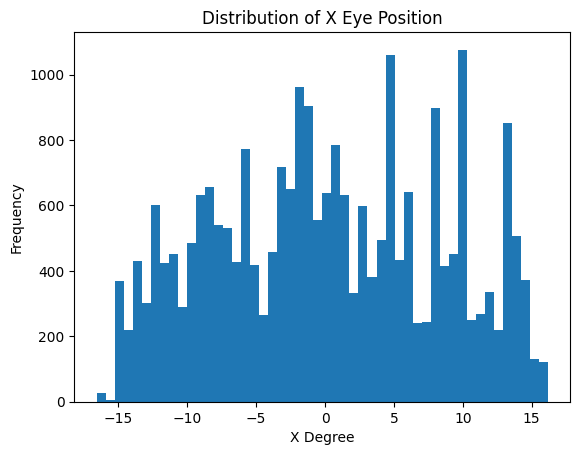

In [21]:

plt.hist(df_valid["X_DEGREE"], bins=50)
plt.xlabel("X Degree")
plt.ylabel("Frequency")
plt.title("Distribution of X Eye Position")
plt.show()


## Visualize Y Eye Position

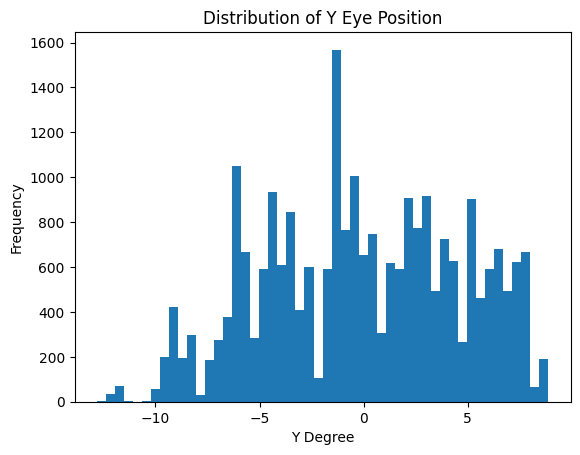

In [22]:
plt.hist(df_valid["Y_DEGREE"], bins=50)
plt.xlabel("Y Degree")
plt.ylabel("Frequency")
plt.title("Distribution of Y Eye Position")
plt.show()